# 			NPV – Mini-Project 
A Company is having its offices across all locations of India. These locations are categorized with respect to zones.  The company has decided to give medical expenditure benefits to their employees.  The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents, age, bmi, smoking and alcoholic habits.
 Answer the following questions to provide insight into the collected dat.
Dataset details ** 
id: Employee id - unique
age: age of primary beneficiary
sex: Gender data - female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
dependent: Number of children other family members who are not earning and dependent on employee.
alcohol: Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely
smoker: Smoking habit.
zone: The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest.
expenditure: Individual medical expenditure by employees during year 2019

 Read the dataset and do primary study of data. Perform following steps: 
 a. Reading some rows of dataset
 b. Learn data types of all features
 c. See the statistical properties of the data.


# Read the dataset and do primary study of data. Perform following steps:
a. Reading some rows of dataset b. Learn data types of all features c. See the statistical properties of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_health=pd.read_csv("emp_health.csv")
emp_health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [3]:
emp_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [4]:
emp_above50_smoke=emp_health[(emp_health.smoke=="yes")&(emp_health.age>50)]
emp_above50_smoke

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [5]:
emp_above50_smoke["id"].count()

64

In [6]:
pd.pivot_table(emp_above50_smoke,index=["smoke"],values=["expenditure"],aggfunc=np.mean)

,expenditure
smoke,
yes,38820.223082


#  2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees


In [7]:
female=emp_health[(emp_health.sex=="female")]
female

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.92400
5,i10017,31,female,25.74,0,no,no,south,3756.62160
6,i10018,46,female,33.44,1,daily,no,south,8240.58960
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
...,...,...,...,...,...,...,...,...,...
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1334,i11346,18,female,31.92,0,daily,no,east,2205.98080
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [8]:
female_total=female.sex.count()
female_total

662

In [9]:
female_alcoholic=female[female.alcohol!="daily"]
female_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
5,i10017,31,female,25.74,0,no,no,south,3756.62160
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
13,i10025,56,female,39.82,0,weekend,no,south,11090.71780
16,i10028,52,female,30.78,1,party,no,north,10797.33620
...,...,...,...,...,...,...,...,...,...
1330,i11342,57,female,25.74,2,no,no,southeast,12629.16560
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [10]:
female_alcoholic_total=female_alcoholic.id.count()
female_alcoholic_total

453

In [11]:
prop=(female_alcoholic_total/female_total)*100
prop

68.42900302114803

# 3. Display zone wise average expenditure of employees on health

In [12]:
zone1=pd.pivot_table(emp_health,index=["zone"],values=["expenditure"],aggfunc={"expenditure":np.mean})
zone1

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


# 4. Employees of which zone did maximum expenditure on health

In [13]:
max_exp_zone=pd.pivot_table(emp_health,index=["zone"],values=["expenditure"],aggfunc={"expenditure":np.sum})
max_exp_zone.reset_index(inplace=True)
max_exp_zone

,zone,expenditure
0,east,3.608966e+06
1,north,9.871808e+05
2,northeast,1.013409e+06
3,northwest,1.761997e+06
4,south,1.236118e+06
5,southeast,2.861684e+06
6,southwest,3.191988e+06
7,west,3.094482e+06


In [14]:
x=max_exp_zone[max_exp_zone.expenditure==max_exp_zone.expenditure.max()]
x

,zone,expenditure
0,east,3.608966e+06


In [15]:
print('zone which did maximum expenditure on health:',x)

zone which did maximum expenditure on health:    zone   expenditure
0  east  3.608966e+06


# 5. What is the minimum expenditure done by any employee in organization

In [16]:
min_exp=pd.pivot_table(emp_health,index=["id"],values=["expenditure"],aggfunc={"expenditure":np.sum})
min_exp

,expenditure
id,
i10012,16884.92400
i10013,1725.55230
i10014,4449.46200
i10015,21984.47061
i10016,3866.85520
...,...
i11345,10600.54830
i11346,2205.98080
i11347,1629.83350


In [17]:
min_exp_id=min_exp.min()
min_exp_id

expenditure    1121.8739
dtype: float64

# 6. What is average expenditure of employees who have 2 or lesser dependents

In [18]:
dep=emp_health[emp_health.dependent<=2]
dep

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
...,...,...,...,...,...,...,...,...,...
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [19]:
dep_avg=pd.pivot_table(dep,index=["id"],values=["expenditure"])
dep_avg

,expenditure
id,
i10012,16884.92400
i10013,1725.55230
i10015,21984.47061
i10016,3866.85520
i10017,3756.62160
...,...
i11343,10795.93733
i11346,2205.98080
i11347,1629.83350


In [20]:
dep_avg.expenditure.mean()

13040.970970948145

# 7. How many employees are below age of 20 years. What is their average BMI

In [21]:
age_20=emp_health[emp_health.age<20]
age_20.age.count()

137

In [22]:
avg_bmi=pd.pivot_table(age_20,index=["id"],values=["bmi"])
avg_bmi

,bmi
id,
i10012,27.900
i10013,33.770
i10027,24.600
i10034,34.100
i10043,26.315
...,...
i11327,28.310
i11328,20.600
i11329,53.130


In [23]:
avg_bmi.mean()

bmi    29.971496
dtype: float64

# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [24]:
non_smoker=emp_health[(emp_health.sex=="male")&(emp_health.smoke=="no")]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [25]:
non_alcoholic=emp_health[(emp_health.sex=="male")&(emp_health.alcohol=="no")]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
 (Hint:Use join and dataframes created in Q8 and Q9)


In [26]:
non_smoking_alcoholic=pd.merge(left=non_smoker,right=non_alcoholic)
non_smoking_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


# 11.What is the count for each zone with respect to number of dependent

In [27]:
y=pd.pivot_table(emp_health,index=["zone"],values=["dependent"],aggfunc="count")
y

,dependent
zone,
east,262
north,70
northeast,74
northwest,145
south,84
southeast,198
southwest,251
west,254


# 12. Classify the employees into 3 categories.
 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.
 Display the bar chart for the same


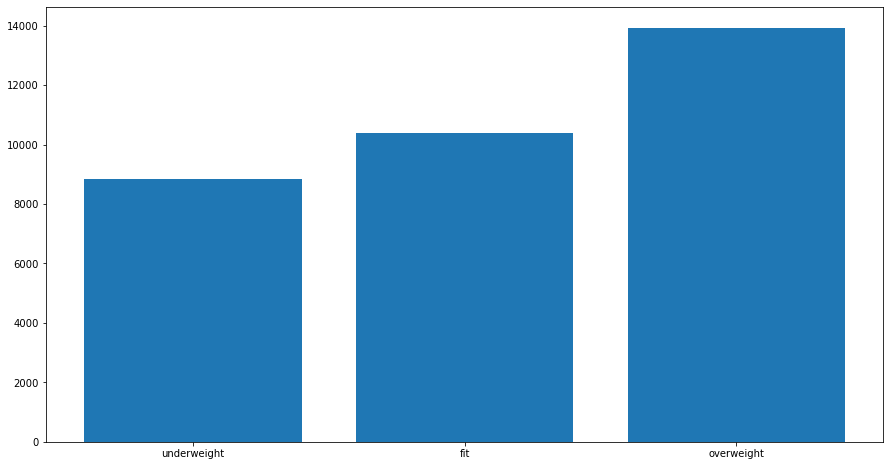

In [28]:
underweight=emp_health[emp_health.bmi<18.5]
fit=emp_health[(emp_health.bmi>18.5)&(emp_health.bmi<24.9)]
overweight=emp_health[emp_health.bmi>24.9]
u=underweight.expenditure.mean()
f=fit.expenditure.mean()
o=overweight.expenditure.mean()
plt.figure(figsize=(15,8))
plt.bar(x=["underweight","fit","overweight"],height=[u,f,o])
plt.show()

# 13. Draw line plot of expenditure against age and BMI

<AxesSubplot:xlabel='age', ylabel='expenditure'>

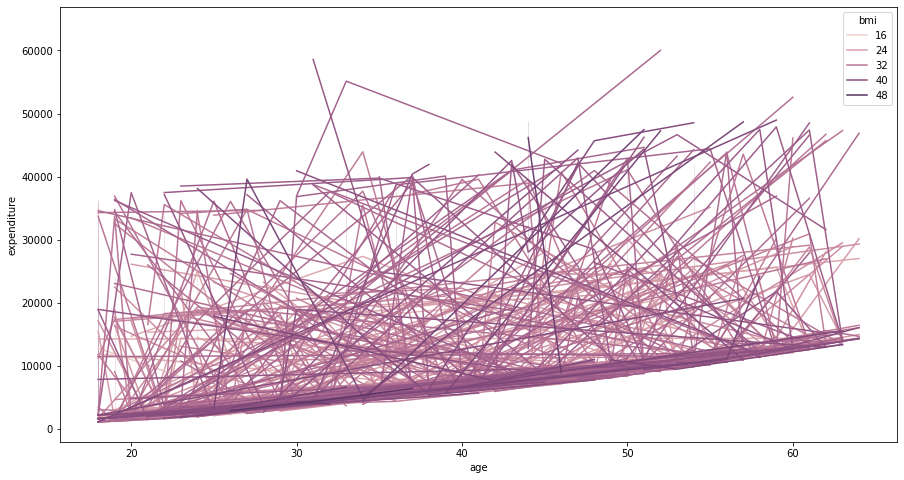

In [29]:
emp_health1=emp_health.loc[:,['age','bmi','expenditure']]
plt.figure(figsize=(15,8))
sns.lineplot(x='age',y='expenditure',hue='bmi',data=emp_health)

# 14. Draw a bar chart to show zone wise average expenditure

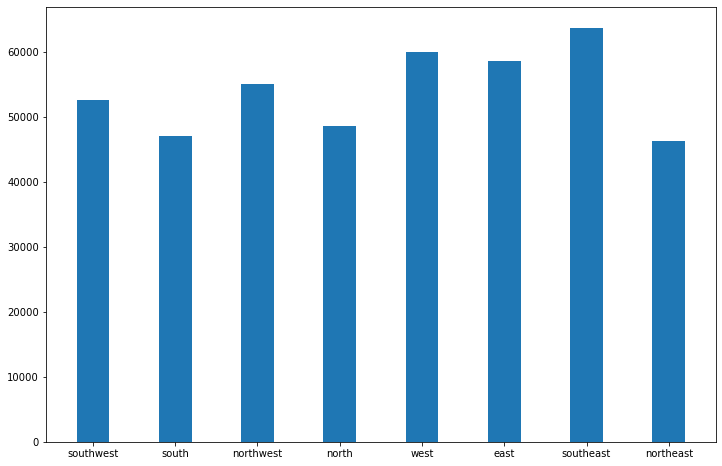

In [30]:
plt.figure(figsize=(12,8))
x=emp_health["zone"]
y=emp_health["expenditure"]
plt.bar(x,y,width=0.4)
plt.show()

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

Text(0, 0.5, 'average expenditure')

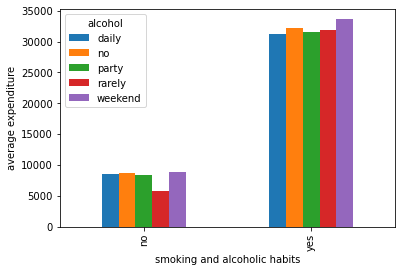

In [31]:
bars_m=pd.pivot_table(data=emp_health,columns=['alcohol'],index=['smoke'],values='expenditure',aggfunc={'expenditure':np.mean})
bars_m
bars_m.plot(kind='bar');
plt.xlabel("smoking and alcoholic habits")
plt.ylabel('average expenditure')

# 16. Draw pie chart for alcohol consumption habits

In [32]:
habits=pd.pivot_table(emp_health,index='zone',values='alcohol',aggfunc='count') 
habits.reset_index(inplace=True)
habits

,zone,alcohol
0,east,262
1,north,70
2,northeast,74
3,northwest,145
4,south,84
5,southeast,198
6,southwest,251
7,west,254


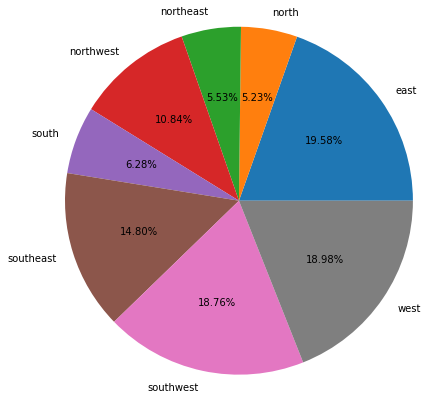

In [33]:
plt.pie(data=habits,x='alcohol',autopct='%1.2f%%',labels='zone',radius=2);

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

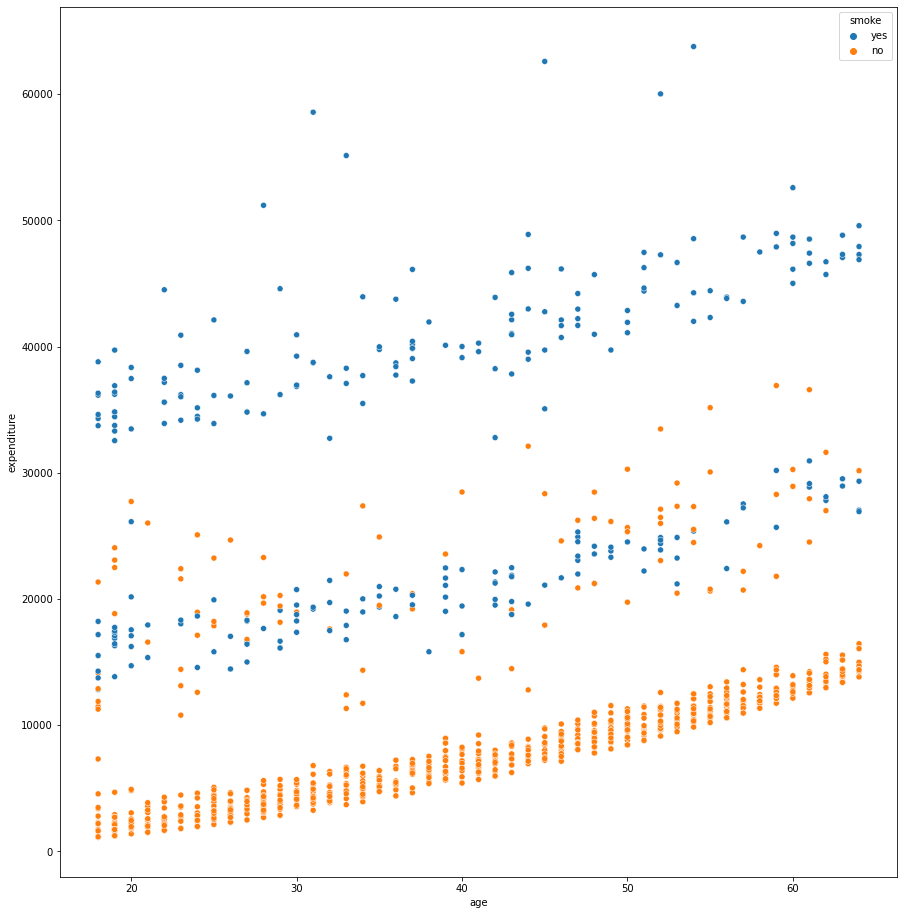

In [34]:
plt.figure(figsize=(15,16))
sns.scatterplot(data=emp_health,x='age',y='expenditure',hue='smoke')

# 18. Draw distribution plot of expenditure

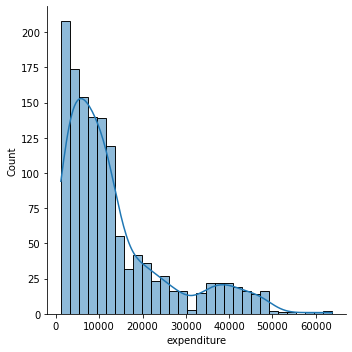

In [35]:
sns.displot(data=emp_health,x='expenditure',kde=True);

# 19. Display the pairplot

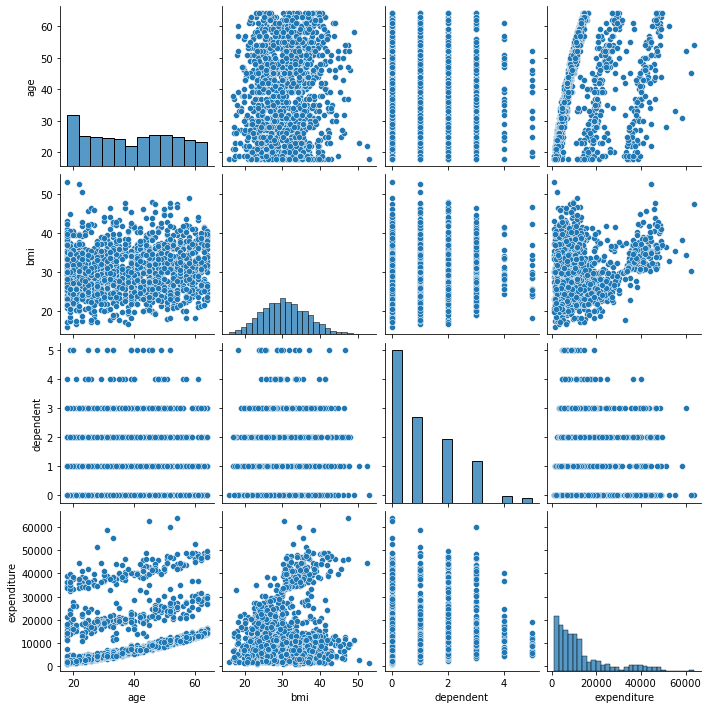

In [36]:
sns.pairplot(emp_health)

# 20. Display heatmap for the data

In [37]:
emp_health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


<AxesSubplot:>

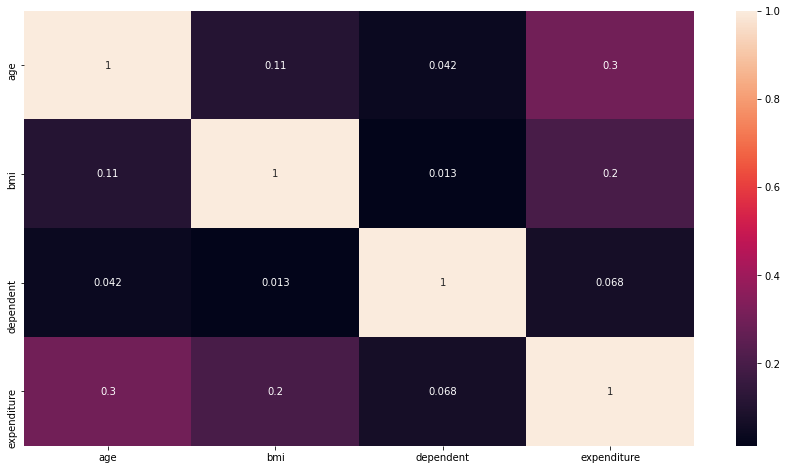

In [39]:
plt.figure(figsize=(15,8))
dataset1=emp_health.corr()
sns.heatmap(dataset1,annot=True)